**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library("UpSetR")
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT = "region.annotation.encode_chromatin_states.ccres.chromhmm.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_chromatin_states.ccres.chromhmm.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.encode_chromatin_states.ccres.chromhmm.tsv 


## Import data

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 414595     11

$fcc_astarr_macs_input_union
[1] 620742     11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Note,Group,Label,Region_Annot,Region_Count
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,encode_ccres_ENCFF286VQG,cCREs:Low-DNase,cCREs,Low-DNase,chr1:10033-10250;chr1:10385-10713,2
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,encode_chromhmm_ENCFF106BGJ,ChromHMM:Quies,ChromHMM,Quies,chr1:0-16000,1
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,encode_chromhmm_ENCFF106BGJ,ChromHMM:Quies,ChromHMM,Quies,chr1:0-16000,1


## Explore: Count table

**Count table: Group**

In [6]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
    res = table(dat$Group, dnn = "Group")
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Group, Freq)
#fun_display_table(dat)
dat %>% kableExtra::kable("markdown")



|Region                        |  cCREs| ChromHMM|
|:-----------------------------|------:|--------:|
|fcc_astarr_macs_input_overlap | 137858|   150042|
|fcc_astarr_macs_input_union   | 211193|   246852|

**Count table: Label of cCREs**

In [7]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group, Label) %>% dplyr::distinct()
    dat = dat %>% dplyr::filter(Group == "cCREs")
    res = table(dat$Label, dnn = "Label")
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Label, Freq)
#fun_display_table(dat)
dat %>% kableExtra::kable("markdown")



|Region                        | CA-CTCF| CA-H3K4me3| CA-only| CA-TF|  dELS| Low-DNase|  pELS|   PLS|
|:-----------------------------|-------:|----------:|-------:|-----:|-----:|---------:|-----:|-----:|
|fcc_astarr_macs_input_overlap |   20916|       3144|    1279| 23545| 15332|    104419| 12893| 12101|
|fcc_astarr_macs_input_union   |   23298|       3240|    1546| 26756| 15782|    181649| 12960| 12077|

**Count table: Label of ChromHMM**

In [8]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group, Label) %>% dplyr::distinct()
    dat = dat %>% dplyr::filter(Group == "ChromHMM")
    res = table(dat$Label, dnn = "Label")
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Label, Freq)
#fun_display_table(dat)
dat %>% kableExtra::kable("markdown")



|Region                        |   Biv|  Enh1|  Enh2| EnhG1| EnhG2|  Het|  Quies| ReprPC|   Tss| TssFlnk| TssFlnkD| TssFlnkU|    Tx|  TxWk| ZNF/Rpts|
|:-----------------------------|-----:|-----:|-----:|-----:|-----:|----:|------:|------:|-----:|-------:|--------:|--------:|-----:|-----:|--------:|
|fcc_astarr_macs_input_overlap | 12367| 11827| 11099|  2331|  5933| 1910|  65212|  31602| 10159|    4144|     7669|    12406| 11981| 31154|     1172|
|fcc_astarr_macs_input_union   | 15567| 13162| 11747|  2622|  8196| 3980| 122715|  63373| 10258|    4476|     7977|    12426| 25794| 39275|     1866|

## Explore: Region overlap

**Region overlap of cCREs label**

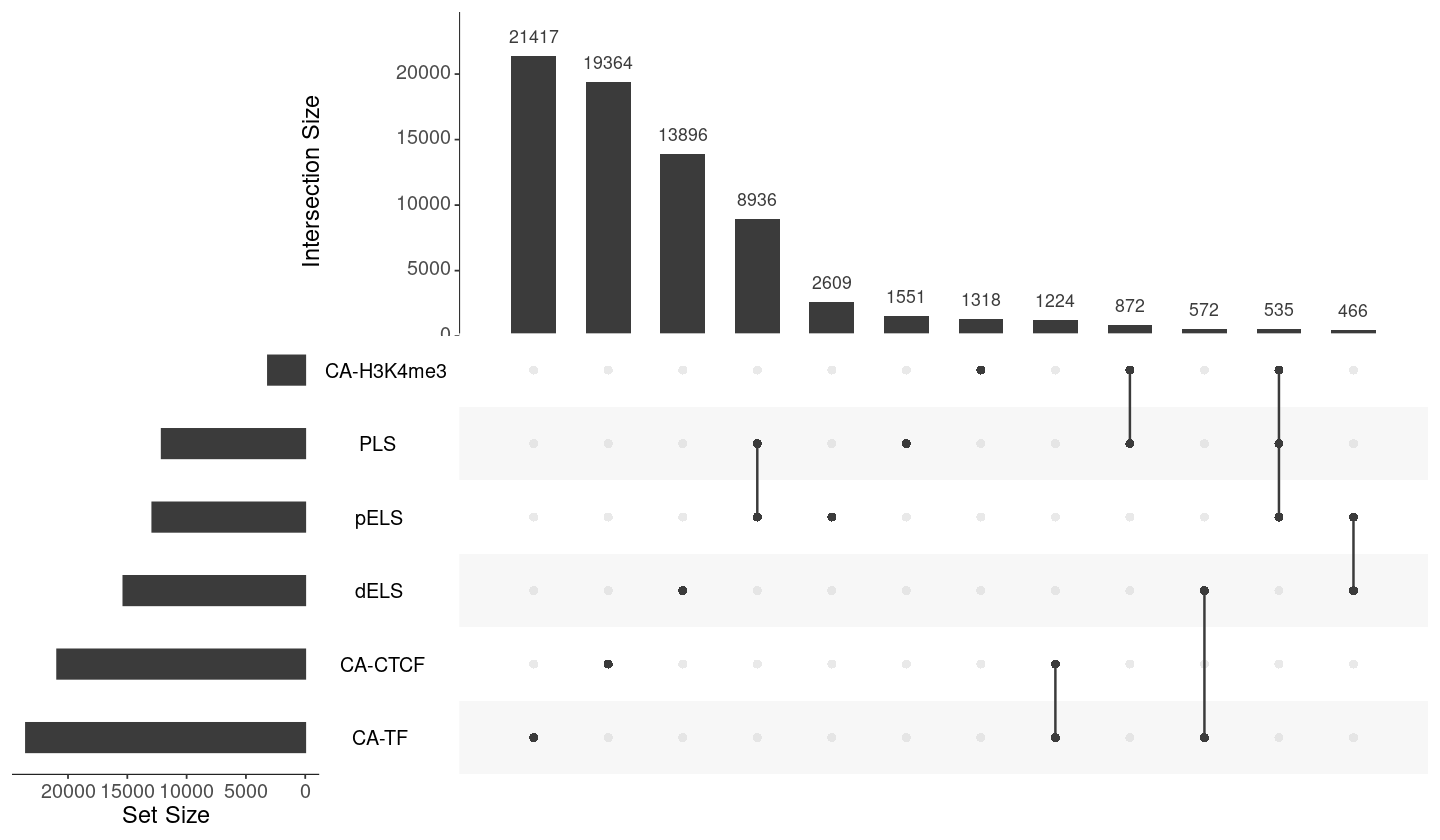

In [9]:
lst = lst_dat_region_annot_import
idx = "fcc_astarr_macs_input_overlap"
dat = lst[[idx]]

dat = dat %>% 
    dplyr::filter(Group == "cCREs") %>%
    dplyr::filter(Label != "Low-DNase") %>% 
    dplyr::filter(Label != "CA-only") %>%
    dplyr::select(Region, Label) %>%
    dplyr::distinct()

lst = split(dat$Region, dat$Label)

options(repr.plot.height=7, repr.plot.width=12)
upset(
    fromList(lst), 
    order.by = "freq", 
    text.scale=1.7, 
    nsets = 10,
    nintersects = 12,
    mb.ratio = c(0.4, 0.6)
)

**Region overlap of ChromHMM label**

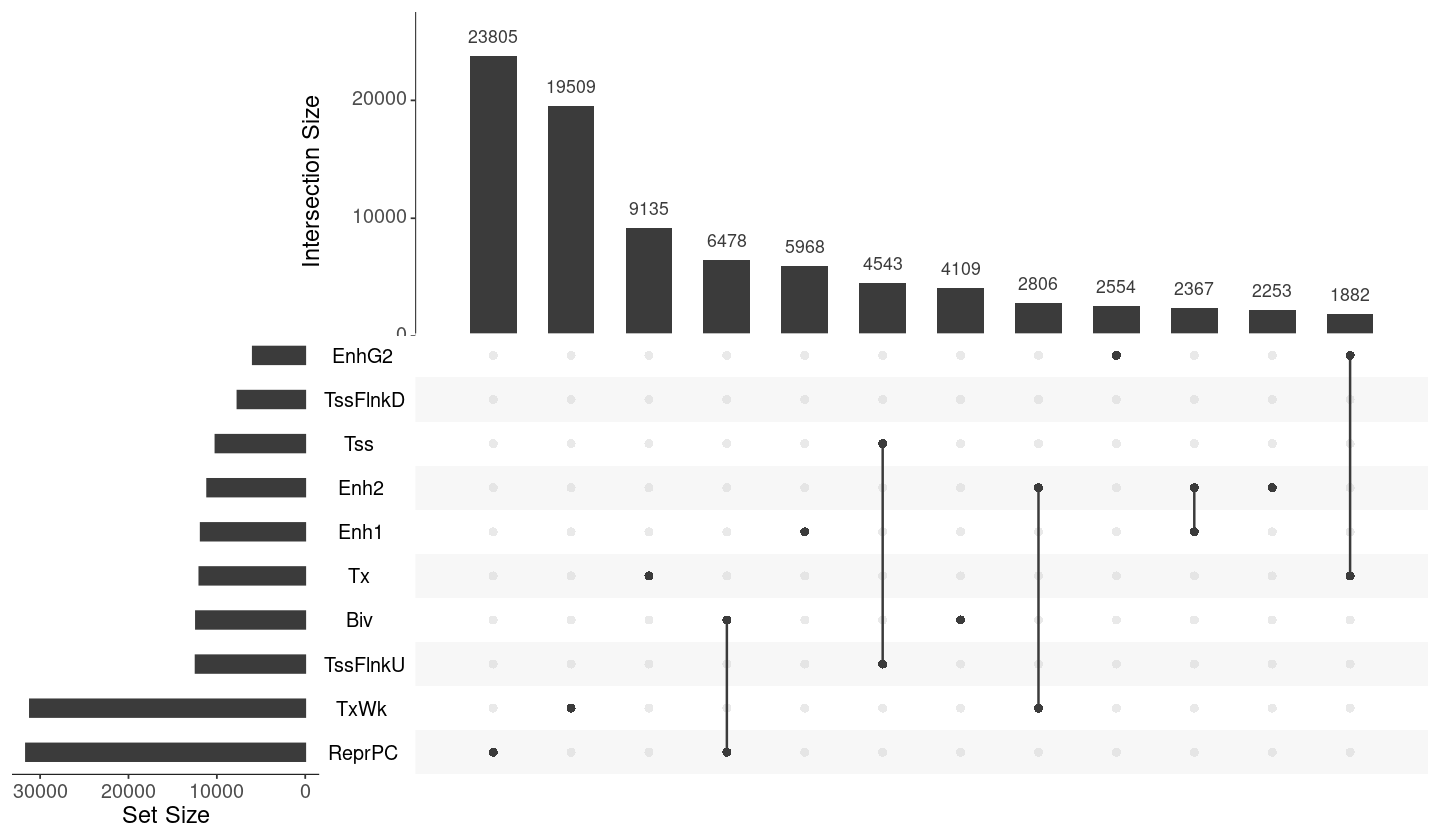

In [10]:
lst = lst_dat_region_annot_import
idx = "fcc_astarr_macs_input_overlap"
dat = lst[[idx]]


dat = dat %>%
    dplyr::filter(Group == "ChromHMM") %>%
    dplyr::filter(Label != "Het") %>% 
    dplyr::filter(Label != "Quies") %>%
    dplyr::filter(Label != "ZNF/Rpts") %>%
    dplyr::select(Region, Label) %>%
    dplyr::distinct()

lst = split(dat$Region, dat$Label)

options(repr.plot.height=7, repr.plot.width=12)
upset(
    fromList(lst), 
    order.by = "freq", 
    text.scale=1.7, 
    nsets = 10,
    nintersects = 12,
    mb.ratio = c(0.4, 0.6)
)